In [ ]:
!pip install nltk
!pip install pandas

In [37]:
import pandas as pd
import numpy as np

# libraries to clean the data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# To vectorize and split the data appropriately
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# random forest
from sklearn.ensemble import RandomForestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier


# scoring models
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

python(92612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(92614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maanyashanker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
MN_bill_text = pd.read_csv("MN_bill_texts_preprocessed.csv")
MN_bill_text.columns = ['bill_id', 'text']

In [39]:
MN_other_stuff = pd.read_csv("bills.csv")
MN_other_stuff.head()

,bill_id,session_id,bill_number,status,status_desc,status_date,title,description,committee_id,committee,last_action_date,last_action,url,state_link
0,1642990,1986,HF1,4,Passed,2023-01-31,Protect Reproductive Options Act; fundamental ...,Protect Reproductive Options Act; fundamental ...,0,NaN,2023-01-31,Secretary of State Chapter 4,https://legiscan.com/MN/bill/HF1/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...
1,1642804,1986,HF2,4,Passed,2023-05-25,"Paid family, bonding, and applicant's serious ...","Paid family, bonding, and applicant's serious ...",0,NaN,2023-05-25,Secretary of State Chapter 59,https://legiscan.com/MN/bill/HF2/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...
2,1642995,1986,HF3,4,Passed,2023-05-05,Voter registration and absentee voting provisi...,Voter registration and absentee voting provisi...,0,NaN,2023-05-05,Secretary of State Chapter 34,https://legiscan.com/MN/bill/HF3/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...
3,1643125,1986,HF4,4,Passed,2023-03-07,Noncompliant driver's license or Minnesota ID ...,Noncompliant driver's license or Minnesota ID ...,0,NaN,2023-03-07,Secretary of State Chapter 13,https://legiscan.com/MN/bill/HF4/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...
4,1642984,1986,HF5,4,Passed,2023-03-17,Free school lunch and breakfast provided for s...,Free school lunch and breakfast provided for s...,0,NaN,2023-03-17,Secretary of State Chapter 18,https://legiscan.com/MN/bill/HF5/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...


In [40]:
MN_other_stuff["status_desc"].value_counts()

status_desc
Introduced    10914
Passed          157
Engrossed        75
Name: count, dtype: int64

In [41]:
new_data = {'bill_id': 1642990, 'text': "11 bill act​ 12 relating health establishing fundamental right reproductive health proposing​ 13 coding new law minnesota statutes chapter 145​ 14 enacted legislature state minnesota​ 15 section reproductive health rights​ 16 subdivision 1 short title section may cited protect reproductive options​ 17 act​ 18 subd 2 definition purposes section reproductive health care means​ 19 health care offered arranged furnished purpose preventing pregnancy​ 110 terminating pregnancy managing pregnancy loss improving maternal health birth​ 111 outcomes reproductive health care includes limited contraception sterilization​ 112 preconception care maternity care abortion care family planning fertility services​ 113 counseling regarding reproductive health care​ 114 subd 3 reproductive freedom every individual fundamental right make​ 115 autonomous decisions individuals reproductive health including the​ 116 fundamental right use refuse reproductive health care​ 117 b every individual becomes pregnant fundamental right continue the​ 118 pregnancy give birth obtain abortion make autonomous decisions about​ 119 exercise fundamental right​ 120 subd 4 right reproductive freedom recognized minnesota constitution​ 121 establishes principles individual liberty personal privacy equality principles​ 122 ensure fundamental right reproductive freedom​ 1​section 1​ revisor sgsbm 2301711​010323 ​ state minnesota​ document made available​ alternative formats upon request​ house representatives​ h f 1​ ninetythird session​ authored kotyzawitthuhn hortman klevorn rehm others​01042023​ bill read first time referred committee health finance policy​21 subd 5 local unit government limitation local unit government may not​ 22 regulate individuals ability freely exercise fundamental rights set forth this​ 23 section manner restrictive set forth section​ 24 effective date section effective day following final enactment​ 2​section 1​ revisor sgsbm 2301711​010323"}
#fix the column names
# Add the new datapoint to the front of the DataFrame
MN_bill_text = pd.concat([pd.DataFrame([new_data]), MN_bill_text], ignore_index=True)

In [42]:
MN_bill_text.dropna(subset=['bill_id', 'text'], inplace=True)
MN_bill_text = MN_bill_text.astype({'bill_id':'int', 'text':'string'})

In [43]:
MN_bill_text.head()

,bill_id,text
0,1642990,11 bill act​ 12 relating health establishing f...
1,1642804,11 bill act​ 12 relating economic development ...
2,1642995,11 bill act​ 12 relating elections modifying p...
3,1643125,11 bill act​ 12 relating transportation modify...
4,1642984,11 bill act​ 12 relating education providing s...


In [44]:
stop_words = stopwords.words('english')

        
def remove_stopwords(texts):
    return [word for word in texts.split() if word not in stop_words]

def clean_text(text):
    text = ' '.join(remove_stopwords(text.lower()))
    # remove punctuation
    text = str(re.sub('[,.!?]', '', text))
    #remove the new line shit
    text = text.replace("\u200b", "")
    #remove all numbers
    text = re.sub(r'\d+', '', text)
    #remove a b c 
    text = text.replace(" a ", "")
    text = text.replace(" b ", "")
    text = text.replace(" c ", "")
    return text

MN_bill_text["clean_text"]= MN_bill_text['text'].apply(lambda x:clean_text(x))

In [45]:
# MN_bill_text["clean_text"][2]

In [46]:
fulldata = pd.merge(MN_bill_text, MN_other_stuff, on=['bill_id'], how='left')
fulldata.head()

,bill_id,text,clean_text,session_id,bill_number,status,status_desc,status_date,title,description,committee_id,committee,last_action_date,last_action,url,state_link
0,1642990,11 bill act​ 12 relating health establishing f...,bill act relating health establishing fundam...,1986,HF1,4,Passed,2023-01-31,Protect Reproductive Options Act; fundamental ...,Protect Reproductive Options Act; fundamental ...,0,NaN,2023-01-31,Secretary of State Chapter 4,https://legiscan.com/MN/bill/HF1/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...
1,1642804,11 bill act​ 12 relating economic development ...,bill act relating economic development provi...,1986,HF2,4,Passed,2023-05-25,"Paid family, bonding, and applicant's serious ...","Paid family, bonding, and applicant's serious ...",0,NaN,2023-05-25,Secretary of State Chapter 59,https://legiscan.com/MN/bill/HF2/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...
2,1642995,11 bill act​ 12 relating elections modifying p...,bill act relating elections modifying provis...,1986,HF3,4,Passed,2023-05-05,Voter registration and absentee voting provisi...,Voter registration and absentee voting provisi...,0,NaN,2023-05-05,Secretary of State Chapter 34,https://legiscan.com/MN/bill/HF3/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...
3,1643125,11 bill act​ 12 relating transportation modify...,bill act relating transportation modifying r...,1986,HF4,4,Passed,2023-03-07,Noncompliant driver's license or Minnesota ID ...,Noncompliant driver's license or Minnesota ID ...,0,NaN,2023-03-07,Secretary of State Chapter 13,https://legiscan.com/MN/bill/HF4/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...
4,1642984,11 bill act​ 12 relating education providing s...,bill act relating education providing school...,1986,HF5,4,Passed,2023-03-17,Free school lunch and breakfast provided for s...,Free school lunch and breakfast provided for s...,0,NaN,2023-03-17,Secretary of State Chapter 18,https://legiscan.com/MN/bill/HF5/2023,https://www.revisor.mn.gov/bills/bill.php?b=Ho...


In [47]:
fulldata['clean_title']= fulldata['title'].apply(lambda x:clean_text(x))
fulldata['clean_description']= fulldata['description'].apply(lambda x:clean_text(x))
fulldata['clean_last_action']= fulldata['last_action'].apply(lambda x:clean_text(x))

In [48]:
df = fulldata
X_train_clean_title_text, X_test_clean_title_text, \
X_train_clean_description_text, X_test_clean_description_text, \
X_train_clean_last_action_text, X_test_clean_last_action_text, \
X_train_bill_text, X_test_bill_text, \
target_train, target_test = train_test_split(
    df['clean_title'],
    df['clean_description'],
    df['clean_last_action'],
    df['text'],
    df['status'],
    test_size=0.2,
    stratify=df['status']
)

In [49]:
#tf-idf
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train_bill_text)
X_test_text = vectorizer.transform(X_test_bill_text)
X_train_title = vectorizer.fit_transform(X_train_clean_title_text)
X_test_title = vectorizer.transform(X_test_clean_title_text)
X_train_desc = vectorizer.transform(X_train_clean_description_text)
X_test_desc = vectorizer.transform(X_test_clean_description_text)
X_train_action = vectorizer.transform(X_train_clean_last_action_text)
X_test_action = vectorizer.transform(X_test_clean_last_action_text)

In [50]:
features_train = np.asarray(np.concatenate([X_train_text.todense(),X_train_title.todense(), X_train_desc.todense(), X_train_action.todense()], axis=1))
features_test = np.asarray(np.concatenate([X_test_text.todense(),X_test_title.todense(), X_test_desc.todense(), X_test_action.todense()], axis=1))



In [51]:
#naive bayes

model = MultinomialNB(alpha=3)

model.fit(features_train, target_train)

test_pred = model.predict(features_test)
test_proba = model.predict_proba(features_test)

print("Accuracy:", metrics.accuracy_score(target_test, test_pred))
#print("AUC Score:", metrics.roc_auc_score(target_test, test_proba, multi_class='ovr'))
print("Precision:", metrics.precision_score(target_test, test_pred, average='weighted'))
print("Recall:",metrics.recall_score(target_test, test_pred, average='weighted'))
print("F1:", metrics.f1_score(target_test, test_pred, average='weighted'))

Accuracy: 0.98140589569161
Precision: 0.9631575320982513
Recall: 0.98140589569161
F1: 0.9721960898496883


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[2164    0    0]
 [  15    0    0]
 [  26    0    0]]


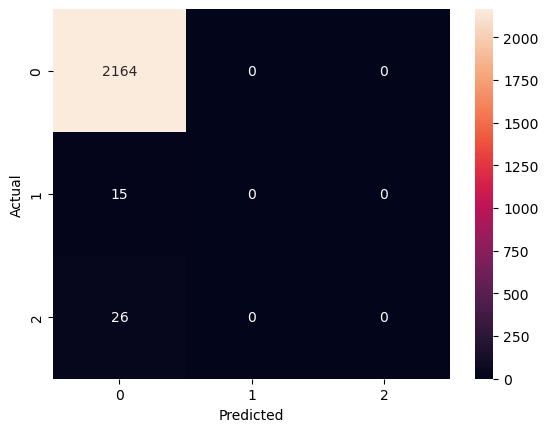

In [53]:
# Create the confusion matrix
cm = metrics.confusion_matrix(target_test, test_pred)

# Print the confusion matrix
print(cm)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
model = KNeighborsClassifier(n_neighbors=11)

# fit model
model.fit(features_train, target_train)

test_pred = model.predict(features_test)
test_proba = model.predict_proba(features_test)
train_pred = model.predict(features_train)
train_proba = model.predict_proba(features_train)

print("Accuracy:", metrics.accuracy_score(target_test, test_pred))
# print("AUC Score:", metrics.roc_auc_score(target_test, test_proba, multi_class='ovr'))
print("Precision:", metrics.precision_score(target_test, test_pred, average='weighted'))
print("Recall:",metrics.recall_score(target_test, test_pred, average='weighted'))
print("F1:", metrics.f1_score(target_test, test_pred, average='weighted'))

python(93272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Accuracy: 0.9922902494331066
Precision: 0.9855476226865499
Recall: 0.9922902494331066
F1: 0.9888858306652158


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[2164    0    0]
 [  15    0    0]
 [   2    0   24]]


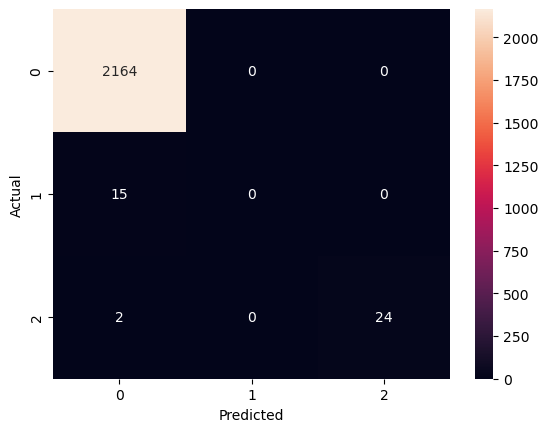

In [56]:
# Create the confusion matrix
cm = metrics.confusion_matrix(target_test, test_pred)

# Print the confusion matrix
print(cm)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(features_train, target_train)

test_pred = model.predict(features_test)
test_proba = model.predict_proba(features_test)
train_pred = model.predict(features_train)
train_proba = model.predict_proba(features_train)

print("Accuracy:", metrics.accuracy_score(target_test, test_pred))
# print("AUC Score:", metrics.roc_auc_score(target_test, test_proba, multi_class='ovr'))
print("Precision:", metrics.precision_score(target_test, test_pred, average='weighted'))
print("Recall:",metrics.recall_score(target_test, test_pred, average='weighted'))
print("F1:", metrics.f1_score(target_test, test_pred, average='weighted'))

Accuracy: 0.981859410430839
Precision: 0.9738738235020037
Recall: 0.981859410430839
F1: 0.9772272549095175


In [ ]:
# Create the confusion matrix
cm = metrics.confusion_matrix(target_test, test_pred)

# Print the confusion matrix
print(cm)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#lets find the omnibus
fulldata.loc[5426,"bill_number"]

In [ ]:
#compute cosign similarities
from sklearn.metrics.pairwise import linear_kernel
#change the indices to match the document index you want to compare to
cosine_similarities = linear_kernel(X_train_text[5426:5427], X_train_text).flatten()
cosine_similarities

In [ ]:
X_train_text

In [ ]:
related_docs_indices = cosine_similarities.argsort()[:-7:-1]
related_docs_indices

In [ ]:
fulldata.loc[related_docs_indices,"bill_number"]

In [ ]:
cosine_similarities[related_docs_indices]

In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
fulldata.head()

In [ ]:
tokenized_docs = [doc.lower().split() for doc in fulldata["text"]]
model = Word2Vec(tokenized_docs, min_count=1, vector_size=100)

In [ ]:
def get_doc_vector(doc, model):
    doc_vector = np.zeros(model.vector_size)
    word_count = 0
    for word in doc:
        if word in model.wv:
            doc_vector += model.wv[word]
            word_count += 1
    if word_count != 0:
        return doc_vector / word_count
    else:
        return np.zeros(model.vector_size)

doc_vectors = [get_doc_vector(doc, model) for doc in tokenized_docs]

In [ ]:
from numpy import dot
from numpy.linalg import norm

omni = doc_vectors[5246]
sims = []
def compute_cosin(x,omni):
    cos_sim = dot(x,omni)/(norm(x)*norm(omni))
    return cos_sim
for x in doc_vectors:
    sim = compute_cosin(x,omni)
    sims.append(sim)

In [ ]:
related_docs_indices = np.array(sims).argsort()[:-7:-1]
related_docs_indices

In [ ]:
fulldata.loc[related_docs_indices,"bill_number"]

In [ ]:
sims[related_docs_indices]